# Classification

(26, 2) (26,)


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


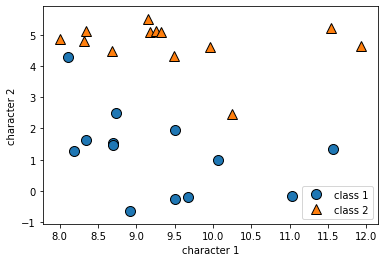

In [99]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있도록 해주는 것
%matplotlib inline 

# 데이터셋 만들기
X, y = mglearn.datasets.make_forge()
print(X.shape, y.shape)

# 산점도 그리기
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('character 1')
plt.ylabel('character 2')
plt.legend(['class 1', 'class 2'], loc = 4) # loc = location of legend

In [100]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(cancer.keys(), '\n')
print('data', cancer['data'].shape, '\n', cancer['feature_names'])
print('target', cancer['target'].shape, cancer['target_names'], '\n')
print('number of class', {n :v for n, v in zip(cancer['target_names'], np.bincount(cancer['target']))})

# n : v for n, v in zip()은 zip 만큼 반복해서 n : v 형태로 출력
# zip(name, value)는 같은 길이의 리스트를 같은 인덱스끼리 잘라서 인덱스로 반환
# np.bincount는 0부터 최대값까지 각 원소의 빈도수를 계산

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']) 

data (569, 30) 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
target (569,) ['malignant' 'benign'] 

number of class {'malignant': 212, 'benign': 357}


# Regression

(50, 1) (50,)


(-3.0, 3.0)

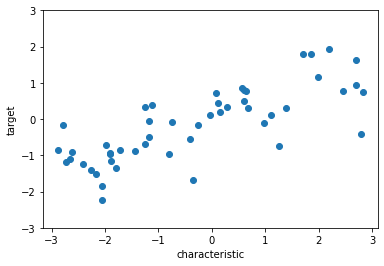

In [101]:
X, y = mglearn.datasets.make_wave(n_samples = 50)
print(X.shape, y.shape)
plt.scatter(X, y) # plt.plot(X, y, 'o')와 실행결과 동일
plt.xlabel('characteristic')
plt.ylabel('target')
plt.ylim(-3, 3)

In [102]:
from sklearn.datasets import load_boston
boston = load_boston()
print('original', boston['data'].shape)

# 특성 공학(특성끼리 곱해서 사용)
X, y = mglearn.datasets.load_extended_boston()
print('change', X.shape)

original (506, 13)
change (506, 104)


# K-Nearest Neighbors

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


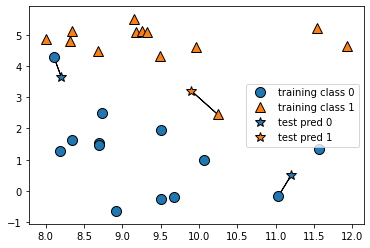

In [103]:
X, y = mglearn.datasets.make_forge()
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


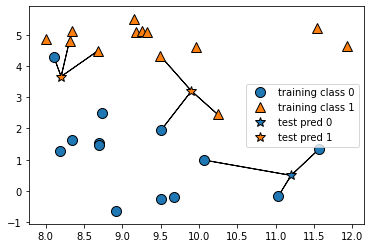

In [104]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [105]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print('predict ', clf.predict(X_test))
print('test ', clf.score(X_test, y_test))

predict  [1 0 1 0 1 0 0]
test  0.8571428571428571


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


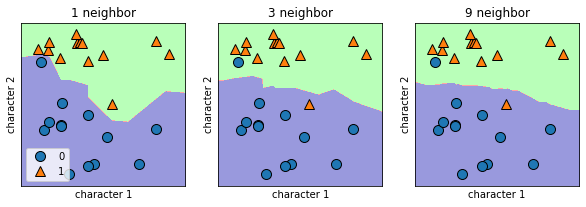

In [118]:
fig, axes = plt.subplots(1, 3, figsize = (10, 3))
for n_neighbor, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors = n_neighbor)
    clf.fit(X, y)
    mglearn.plots.plot_2d_classification(clf, X, fill = True, ax = ax, eps = 0.5, alpha = 0.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax = ax)
    ax.set_title('{} neighbor'.format(n_neighbor))
    ax.set_xlabel('character 1')
    ax.set_ylabel('character 2')
axes[0].legend(loc = 3)

Text(0, 0.5, 'accuracy')

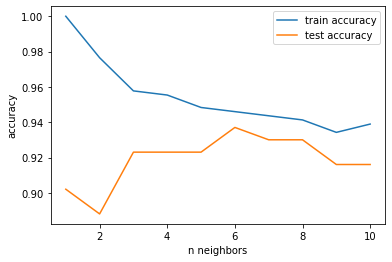

In [126]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], stratify = cancer['target'], random_state = 66)

train_accuracy = []
test_accuracy = []

for i in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    train_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(range(1, 11), train_accuracy, label = 'train accuracy')
plt.plot(range(1, 11), test_accuracy, label = 'test accuracy')
plt.legend()
plt.xlabel('n neighbors')
plt.ylabel('accuracy')

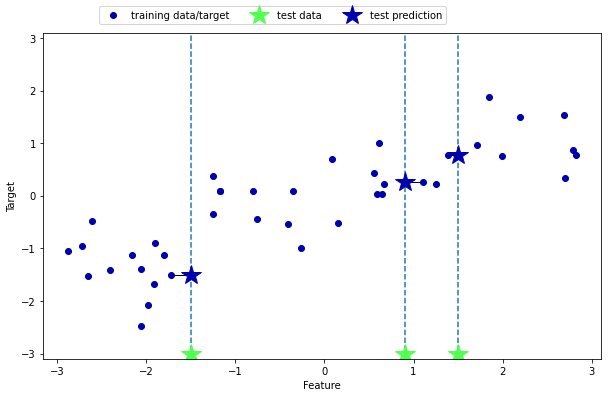

In [127]:
X, y = mglearn.datasets.make_wave()
mglearn.plots.plot_knn_regression(n_neighbors = 1)

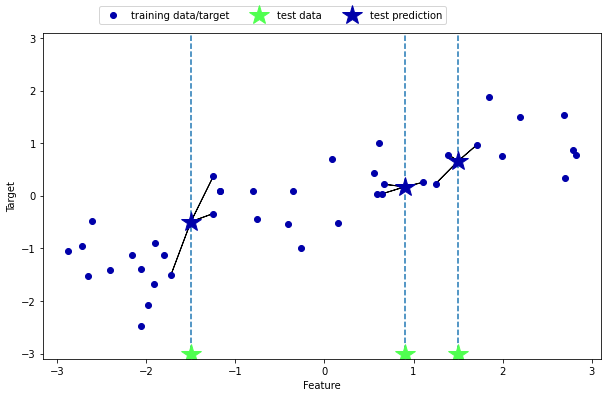

In [128]:
mglearn.plots.plot_knn_regression(n_neighbors = 3)

Text(0, 0.5, 'accuracy')

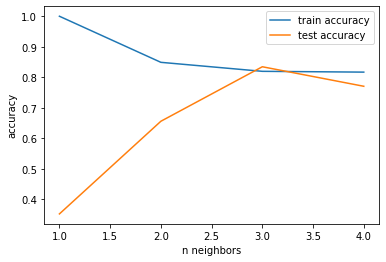

In [134]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples = 40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

train_accuracy = []
test_accuracy = []

for i in range(1, 5):
    reg = KNeighborsRegressor(n_neighbors = i).fit(X_train, y_train)
    train_accuracy.append(reg.score(X_train, y_train))
    test_accuracy.append(reg.score(X_test, y_test))

plt.plot(range(1, 5), train_accuracy, label = 'train accuracy')
plt.plot(range(1, 5), test_accuracy, label = 'test accuracy')
plt.legend()
plt.xlabel('n neighbors')
plt.ylabel('accuracy')

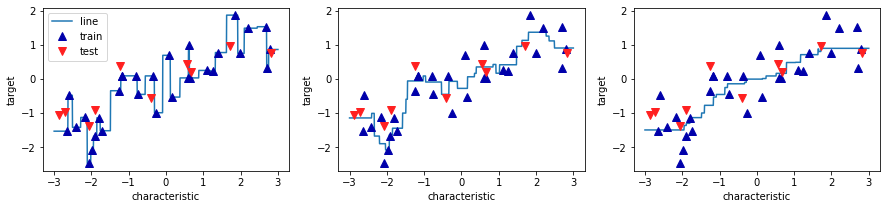

In [147]:
fig, axes = plt.subplots(1, 3, figsize = (15, 3))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
# reshape(-1, 1) : 원래 배열의 길이와 남은 차원으로부터 추정
# numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)

for n_neighbor, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors = n_neighbor).fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c = mglearn.cm2(0), markersize = 8)
    ax.plot(X_test, y_test, 'v', c = mglearn.cm2(1), markersize = 8)
    ax.set_xlabel('characteristic')
    ax.set_ylabel('target')
axes[0].legend(['line', 'train', 'test'], loc = 'best')